# **Data Analysis of 'Cleaned_Venta_casas'**

### **Importing libraries and Loading cleaned Data**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, kurtosis, skew #for some statistics

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
sns.set(rc={'figure.figsize':(10.275,7.7025)}) #Setting size of plots

In [751]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [752]:
# Loading Data
df = pd.read_csv('drive/My Drive/Cleaned_Venta_casas.csv')
df = df.drop(columns = ['Unnamed: 0'])
print('Lenght:',len(df))
df.head() 

Lenght: 9742


,Tipo de Propiedad,Zona,Barrio,Tipo de Barrio,Cantidad de Dormitorios,Cantidad de Baños,Cantidad de Cocheras,Superficie Cubierta m2,Superficie Total m2,Zona_was_missing,Barrio_was_missing,Tipo de Barrio_was_missing,Cantidad de Dormitorios_was_missing,Cantidad de Baños_was_missing,Cantidad de Cocheras_was_missing,Superficie Cubierta m2_was_missing,Superficie Total m2_was_missing,Valor
0,Duplex,Sur,Claros del Bosque,Cerrado,3.000,3.000,1.000,160.000,180.000,False,False,False,False,False,False,False,False,185000.000
1,Duplex,Sur,Greenville 2,Con Seguridad,3.000,2.000,0.000,188.575,332.736,False,False,False,False,True,True,True,True,225000.000
2,Casa,Cerro-Argüello,La Herradura,Country,3.000,3.000,2.000,400.000,1592.000,False,False,False,False,False,False,False,False,380000.000
3,Casa,Sudeste,Maipú Sección 2,Abierto,4.000,4.000,2.000,316.000,350.000,False,False,False,False,False,False,False,False,250000.000
4,Casa,Sudeste,Maipú Sección 2,Abierto,3.000,2.000,1.000,221.000,296.000,False,False,False,False,False,False,False,False,135000.000


### **Dependent variable ('Valor')**

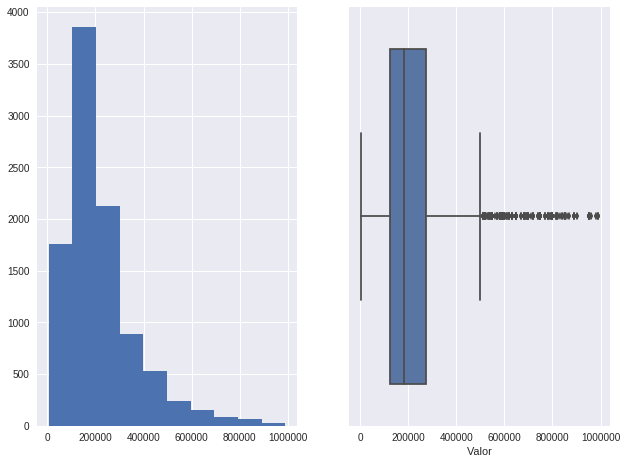

In [753]:
# First approximation to 'Valor', looking for outliers and shape of distribution
plt.subplot(1, 2, 1)
plt.hist(df.Valor)
plt.subplot(1, 2, 2)
sns.boxplot(df.Valor)
plt.show()

Lenght: 9166


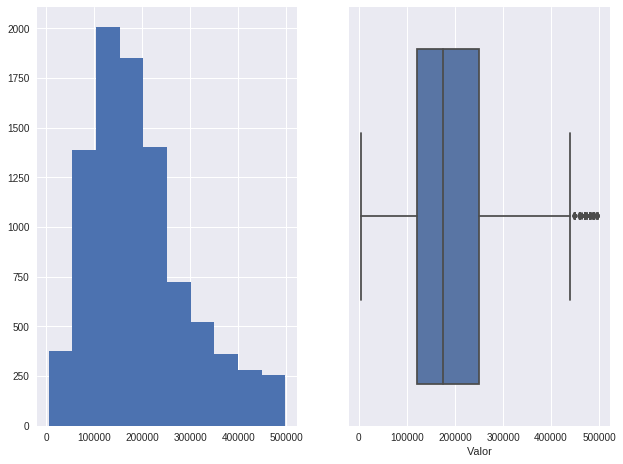

In [754]:
# Cleaning outliers
df = df.loc[(df.Valor < 500000)]
plt.subplot(1, 2, 1)
plt.hist(df.Valor)
plt.subplot(1, 2, 2)
sns.boxplot(df.Valor)
print('Lenght:',len(df))
plt.show()

Mean: 195031 | Standard Deviation: 103555
Median: 175000 | Range: 492975
Kurtosis: 0.07 | Skewness: 0.79


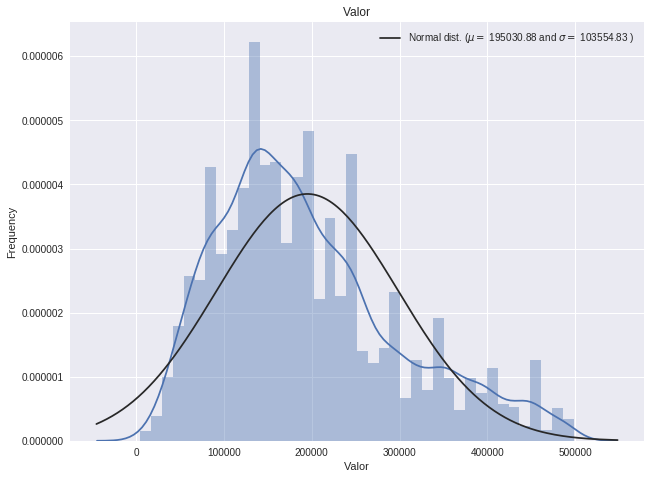

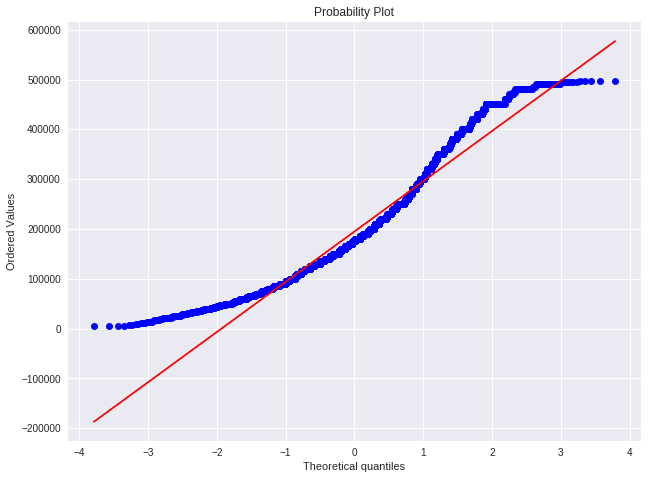

In [755]:
# Analysing the distribution of the feature 'Valor'
mu, sigma = norm.fit(df.Valor)
print('Mean: %s | Standard Deviation: %s'%("%.0f"% mu,"%.0f"% sigma)) 
print('Median: %s | Range: %s'%("%.0f"% np.median(df.Valor),"%.0f"% np.ptp(df.Valor))) 
print('Kurtosis: %s | Skewness: %s'%("%.2f"% kurtosis(df.Valor),"%.2f"% skew(df.Valor))) 


sns.distplot(df.Valor, fit=norm) 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Valor')      

fig = plt.figure()
res = stats.probplot(df.Valor, plot=plt)

plt.show() # Right-Skewed distribution, tipically of a log-normal

Mean: 195031 | Standard Deviation: 103555
Median: 175000 | Range: 492975
Kurtosis: 0.07 | Skewness: 0.79


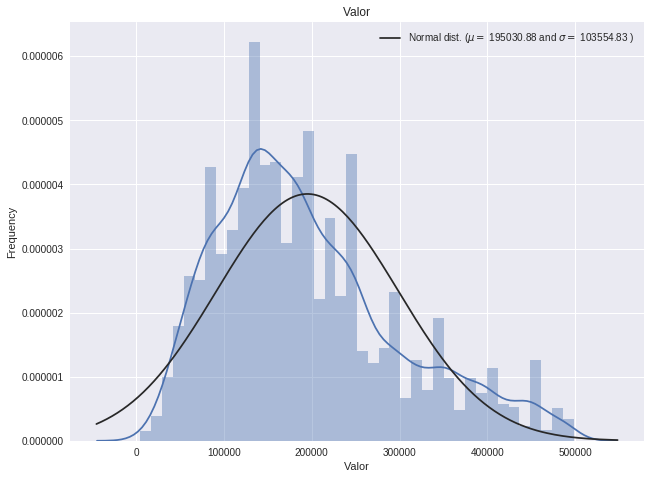

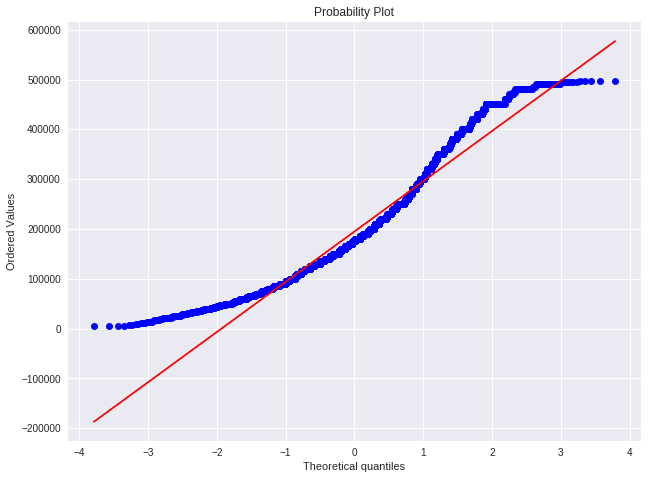

In [756]:
#Apply np.log1p which applies log(1+x) to all elements of the column 'Valor', normalizing its distribution
# df.Valor = np.log1p(df.Valor)

#Checking the new distribution 
mu, sigma = norm.fit(df.Valor)
print('Mean: %s | Standard Deviation: %s'%("%.0f"% mu,"%.0f"% sigma)) 
print('Median: %s | Range: %s'%("%.0f"% np.median(df.Valor),"%.0f"% np.ptp(df.Valor)))
print('Kurtosis: %s | Skewness: %s'%("%.2f"% kurtosis(df.Valor),"%.2f"% skew(df.Valor))) 

sns.distplot(df.Valor, fit=norm) 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Valor')      

fig = plt.figure()
res = stats.probplot(df.Valor, plot=plt)

plt.show() 

### **Numerical features**

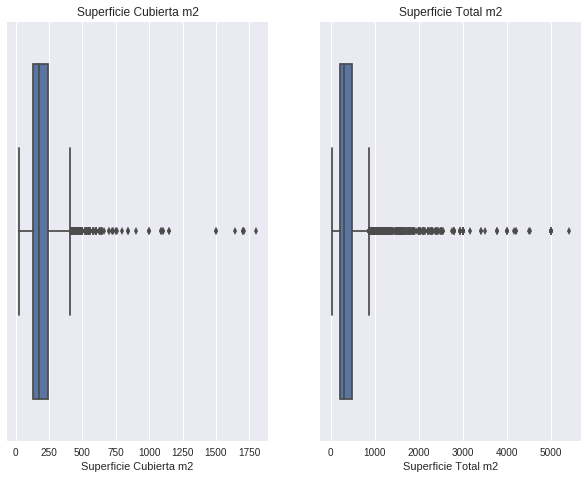

In [757]:
# Analysing outliers from 'Superficie Cubierta m2' & 'Superficie Total m2'
plt.subplot(1, 2, 1)
sns.boxplot(df['Superficie Cubierta m2'])
plt.title('Superficie Cubierta m2')
plt.subplot(1, 2, 2)
sns.boxplot(df['Superficie Total m2'])
plt.title('Superficie Total m2')
plt.show()

Lenght: 8271


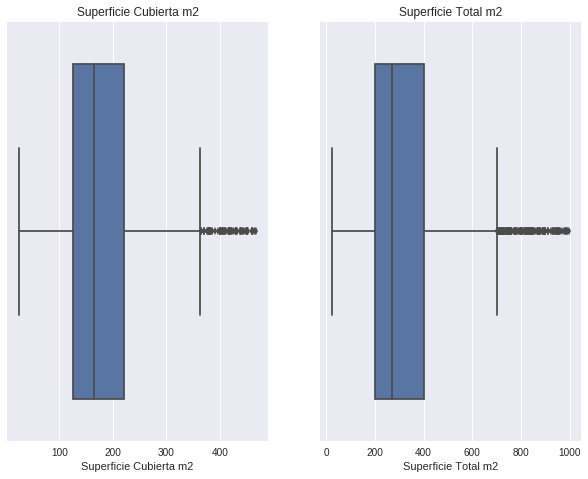

In [758]:
# Cleaning outliers from 'Superficie Cubierta m2' & 'Superficie Total m2'
df = df.loc[(df['Superficie Cubierta m2'] > 0) & (df['Superficie Cubierta m2'] < 480)]
df = df.loc[(df['Superficie Total m2'] > 0) & (df['Superficie Total m2'] < 1000)]

# Plotting results
plt.subplot(1, 2, 1)
sns.boxplot(df['Superficie Cubierta m2'])
plt.title('Superficie Cubierta m2')
plt.subplot(1, 2, 2)
sns.boxplot(df['Superficie Total m2'])
plt.title('Superficie Total m2')
print('Lenght:',len(df))
plt.show()

Superficie Cubierta m2 =  Median: 165.0 | Range: 442.0
Superficie Total m2 =  Median: 271.0 | Range: 973.0
Superficie Cubierta m2 =  Kurtosis: 0.97 | Skewness: 0.96
Superficie Total m2 =  Kurtosis: 1.53 | Skewness: 1.34


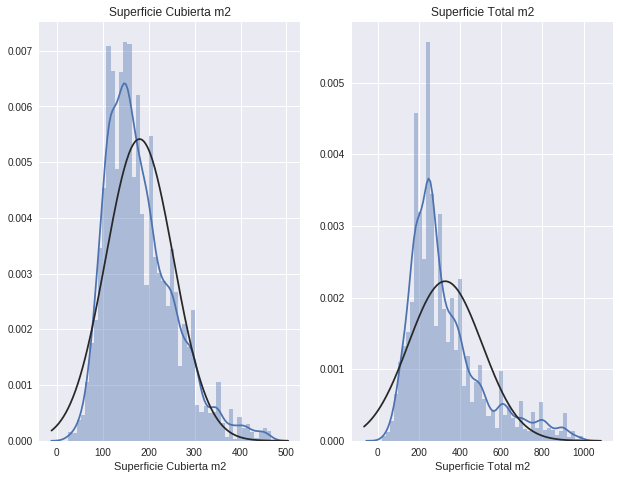

In [759]:
plt.subplot(1, 2, 1)
sns.distplot(df['Superficie Cubierta m2'], fit=norm)
plt.title('Superficie Cubierta m2')
plt.subplot(1, 2, 2)
sns.distplot(df['Superficie Total m2'], fit=norm)
plt.title('Superficie Total m2')

# Both distributions are skewed to the right. So the median will be their central tendency
print('Superficie Cubierta m2 = ','Median: %s | Range: %s'%(np.median(df['Superficie Cubierta m2']), np.ptp(df['Superficie Cubierta m2']))) 
print('Superficie Total m2 = ','Median: %s | Range: %s'%(np.median(df['Superficie Total m2']), np.ptp(df['Superficie Total m2']))) 
print('Superficie Cubierta m2 = ','Kurtosis: %s | Skewness: %s'%("%.2f"% kurtosis(df['Superficie Cubierta m2']),"%.2f"% skew(df['Superficie Cubierta m2']))) 
print('Superficie Total m2 = ','Kurtosis: %s | Skewness: %s'%("%.2f"% kurtosis(df['Superficie Total m2']),"%.2f"% skew(df['Superficie Total m2']))) 

plt.show()

Superficie Cubierta m2 =  Median: 5.111987788356544 | Range: 2.890371757896165
Superficie Total m2 =  Median: 5.605802066295998 | Range: 3.7266969396138925
Superficie Cubierta m2 =  Kurtosis: 0.28 | Skewness: -0.19
Superficie Total m2 =  Kurtosis: 0.20 | Skewness: 0.00


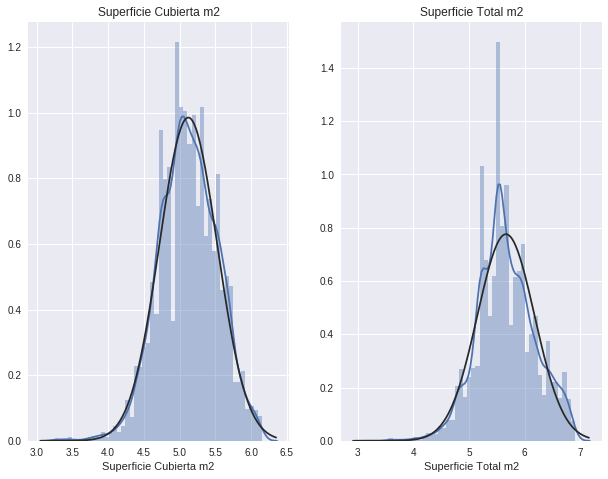

In [760]:
#Apply np.log1p which applies log(1+x) to all elements of 'Superficie Cubierta m2' & 'Superficie Total m2', normalizing their distributions
df['Superficie Cubierta m2'] = np.log1p(df['Superficie Cubierta m2'])
df['Superficie Total m2'] = np.log1p(df['Superficie Total m2'])

#Checking the new distributions
plt.subplot(1, 2, 1)
sns.distplot(df['Superficie Cubierta m2'], fit=norm)
plt.title('Superficie Cubierta m2')
plt.subplot(1, 2, 2)
sns.distplot(df['Superficie Total m2'], fit=norm)
plt.title('Superficie Total m2')

# Both distributions are skewed to the right. So the median will be their central tendency
print('Superficie Cubierta m2 = ','Median: %s | Range: %s'%(np.median(df['Superficie Cubierta m2']), np.ptp(df['Superficie Cubierta m2']))) 
print('Superficie Total m2 = ','Median: %s | Range: %s'%(np.median(df['Superficie Total m2']), np.ptp(df['Superficie Total m2'])))
print('Superficie Cubierta m2 = ','Kurtosis: %s | Skewness: %s'%("%.2f"% kurtosis(df['Superficie Cubierta m2']),"%.2f"% skew(df['Superficie Cubierta m2']))) 
print('Superficie Total m2 = ','Kurtosis: %s | Skewness: %s'%("%.2f"% kurtosis(df['Superficie Total m2']),"%.2f"% skew(df['Superficie Total m2']))) 

plt.show()

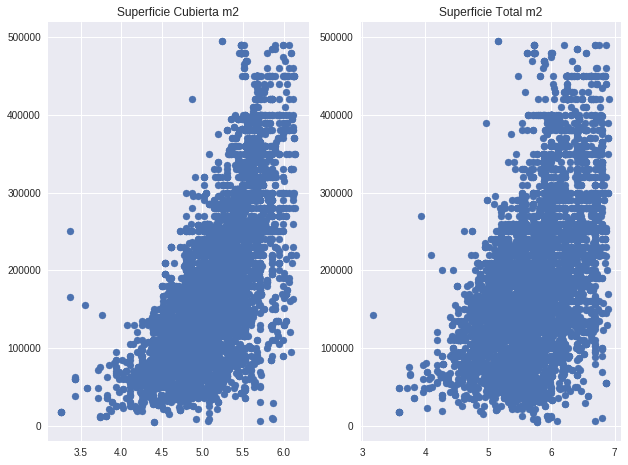

In [761]:
# Finding correlations between Valor', Superficie Cubierta m2' & 'Superficie Total m2'
plt.subplot(1, 2, 1)
plt.scatter(df['Superficie Cubierta m2'], df.Valor)
plt.title('Superficie Cubierta m2')
plt.subplot(1, 2, 2)
plt.scatter(df['Superficie Total m2'], df.Valor)
plt.title('Superficie Total m2')
plt.show() # There are positive correlations between 'Superficie Cubierta m2'&'Superficie Total m2' and 'Valor'

### **Categorical features**

In [762]:
# Replacing values in 'Tipo de Propiedad', 'Zona', 'Barrio' & 'Tipo de Barrio' with numerical data
categ = ['Tipo de Propiedad','Zona','Barrio','Tipo de Barrio']
p = []
for valor in categ:
  propiedad = {}
  for x, i in enumerate([str(i) for i in df[valor].unique()]):
      propiedad[i] = x 
  df[valor].replace(propiedad, inplace=True)
  p.append(propiedad)

print('Lenght:',len(df))
df.head()

Lenght: 8271


,Tipo de Propiedad,Zona,Barrio,Tipo de Barrio,Cantidad de Dormitorios,Cantidad de Baños,Cantidad de Cocheras,Superficie Cubierta m2,Superficie Total m2,Zona_was_missing,Barrio_was_missing,Tipo de Barrio_was_missing,Cantidad de Dormitorios_was_missing,Cantidad de Baños_was_missing,Cantidad de Cocheras_was_missing,Superficie Cubierta m2_was_missing,Superficie Total m2_was_missing,Valor
0,0,0,0,0,3.000,3.000,1.000,5.081,5.198,False,False,False,False,False,False,False,False,185000.000
1,0,0,1,1,3.000,2.000,0.000,5.245,5.810,False,False,False,False,True,True,True,True,225000.000
3,1,1,2,2,4.000,4.000,2.000,5.759,5.861,False,False,False,False,False,False,False,False,250000.000
4,1,1,2,2,3.000,2.000,1.000,5.403,5.694,False,False,False,False,False,False,False,False,135000.000
5,0,0,3,1,3.000,2.000,1.000,5.013,4.836,True,True,True,False,False,False,True,False,145000.000


### **'Was_missing' columns**

In [763]:
# Replacing Boolean values from 'was_missing' columns with int (0,1)
was_missing = ['Zona_was_missing',
               'Barrio_was_missing',
               'Tipo de Barrio_was_missing',
               'Cantidad de Dormitorios_was_missing',
               'Cantidad de Baños_was_missing',
               'Cantidad de Cocheras_was_missing',
               'Superficie Cubierta m2_was_missing',
               'Superficie Total m2_was_missing',]

for i in was_missing:
  df[i] = df[i].astype(int)

print('Lenght:',len(df))
df.head()

Lenght: 8271


,Tipo de Propiedad,Zona,Barrio,Tipo de Barrio,Cantidad de Dormitorios,Cantidad de Baños,Cantidad de Cocheras,Superficie Cubierta m2,Superficie Total m2,Zona_was_missing,Barrio_was_missing,Tipo de Barrio_was_missing,Cantidad de Dormitorios_was_missing,Cantidad de Baños_was_missing,Cantidad de Cocheras_was_missing,Superficie Cubierta m2_was_missing,Superficie Total m2_was_missing,Valor
0,0,0,0,0,3.000,3.000,1.000,5.081,5.198,0,0,0,0,0,0,0,0,185000.000
1,0,0,1,1,3.000,2.000,0.000,5.245,5.810,0,0,0,0,1,1,1,1,225000.000
3,1,1,2,2,4.000,4.000,2.000,5.759,5.861,0,0,0,0,0,0,0,0,250000.000
4,1,1,2,2,3.000,2.000,1.000,5.403,5.694,0,0,0,0,0,0,0,0,135000.000
5,0,0,3,1,3.000,2.000,1.000,5.013,4.836,1,1,1,0,0,0,1,0,145000.000


### **Analysing distributions**

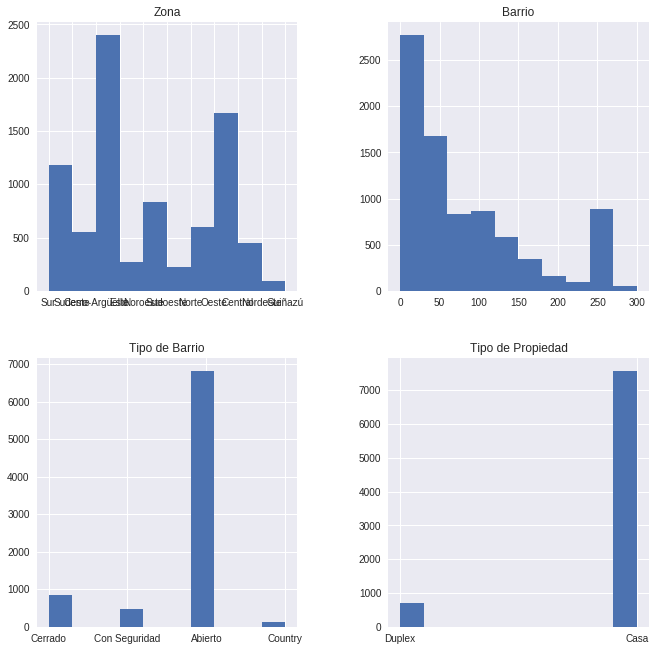

In [764]:
# Analysing the distributions of 'Tipo de Propiedad', 'Zona', 'Barrio' & 'Tipo de Barrio'
fig = plt.figure(figsize=(10, 10))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

plt.subplot(2, 2, 1)
plt.xticks([value for key, value in p[1].items()], [key for key, value in p[1].items()])
plt.hist(df.Zona)
plt.title('Zona')

plt.subplot(2, 2, 2)
plt.hist(df.Barrio)
plt.title('Barrio')

plt.subplot(2, 2, 3)
plt.xticks([value for key, value in p[3].items()], [key for key, value in p[3].items()])
plt.hist(df['Tipo de Barrio'])
plt.title('Tipo de Barrio')

plt.subplot(2, 2, 4)
plt.xticks([value for key, value in p[0].items()], [key for key, value in p[0].items()])
plt.hist(df['Tipo de Propiedad'])
plt.title('Tipo de Propiedad')

plt.show() 

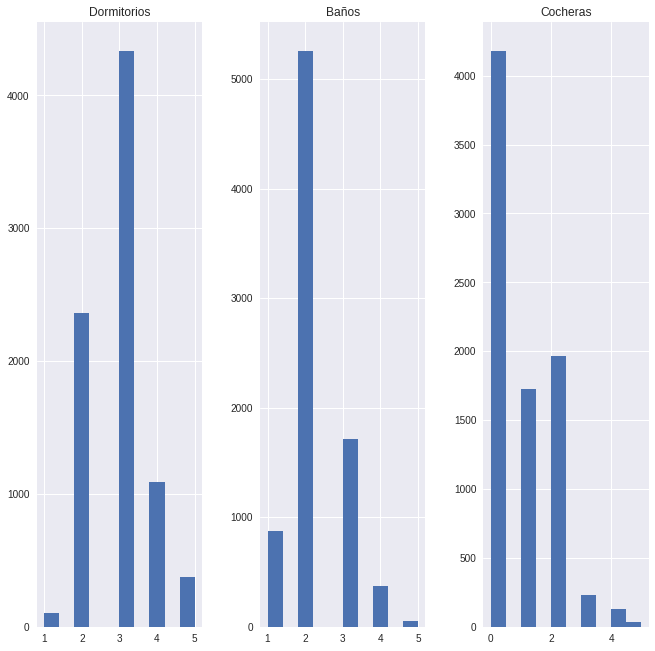

In [765]:
# Analysing the distributions of 'Cantidad de Dormitorios',	'Cantidad de Baños' & 'Cantidad de Cocheras'
fig = plt.figure(figsize=(10, 10))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

plt.subplot(1, 3, 1)
plt.hist(df['Cantidad de Dormitorios'])
plt.title('Dormitorios')

plt.subplot(1, 3, 2)
plt.hist(df['Cantidad de Baños'])
plt.title('Baños')

plt.subplot(1, 3, 3)
plt.hist(df['Cantidad de Cocheras'])
plt.title('Cocheras')

plt.show() 

### **Analysing correlations between the features**

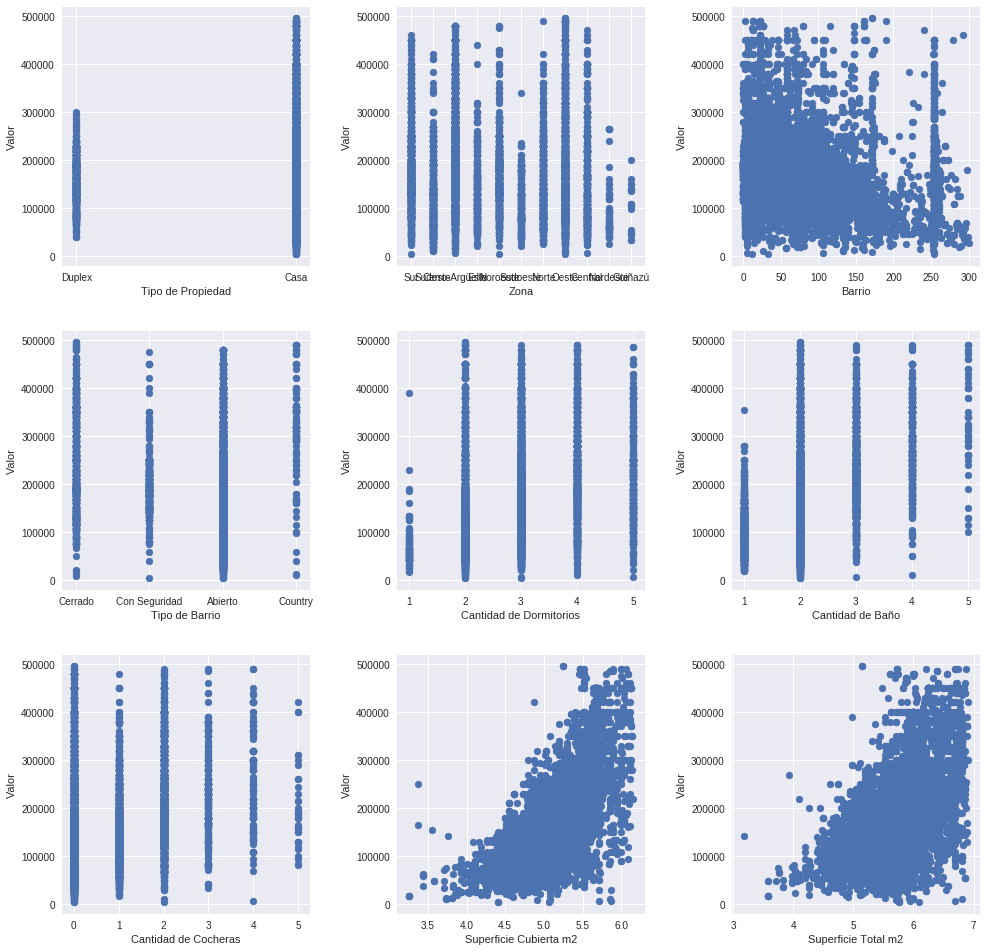

In [766]:
# Analysing correlations between all independent variables and Valor
fig = plt.figure(figsize=(15, 15))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

# 'Tipo de Propiedad' vs. 'Valor'
plt.subplot(3, 3, 1)
plt.xlabel("Tipo de Propiedad")
plt.ylabel("Valor")
plt.xticks([value for key, value in p[0].items()], [key for key, value in p[0].items()])
plt.scatter(df['Tipo de Propiedad'], df.Valor)

# 'Zona' vs. 'Valor'
plt.subplot(3, 3, 2)
plt.xlabel("Zona")
plt.ylabel("Valor")
plt.xticks([value for key, value in p[1].items()], [key for key, value in p[1].items()])
plt.scatter(df.Zona,df.Valor) 

# 'Barrio' vs. 'Valor' 
plt.subplot(3, 3, 3)
plt.xlabel("Barrio")
plt.ylabel("Valor")
plt.scatter(df.Barrio,df.Valor)

# 'Tipo de Barrio' vs. 'Valor' 
plt.subplot(3, 3, 4)
plt.xlabel("Tipo de Barrio")
plt.ylabel("Valor")
plt.xticks([0,1,2,3], [key for key, value in p[3].items()])
plt.scatter(df['Tipo de Barrio'],df.Valor)

# 'Cantidad de Dormitorios' vs. 'Valor'
plt.subplot(3, 3, 5)
plt.xlabel("Cantidad de Dormitorios")
plt.ylabel("Valor")
plt.scatter(df['Cantidad de Dormitorios'],df.Valor) 

# 'Cantidad de Baños' vs. 'Valor'
plt.subplot(3, 3, 6)
plt.xlabel("Cantidad de Baño")
plt.ylabel("Valor")
plt.scatter(df['Cantidad de Baños'],df.Valor)

# 'Cantidad de Cocheras' vs. 'Valor'
plt.subplot(3, 3, 7)
plt.xlabel("Cantidad de Cocheras")
plt.ylabel("Valor")
plt.scatter(df['Cantidad de Cocheras'],df.Valor)

# 'Superficie Cubierta m2' vs. 'Valor'
plt.subplot(3, 3, 8)
plt.xlabel("Superficie Cubierta m2")
plt.ylabel("Valor")
plt.scatter(df['Superficie Cubierta m2'], df.Valor)

# 'Superficie Total m2' vs. 'Valor'
plt.subplot(3, 3, 9)
plt.xlabel("Superficie Total m2")
plt.ylabel("Valor")
plt.scatter(df['Superficie Total m2'], df.Valor)

plt.show()

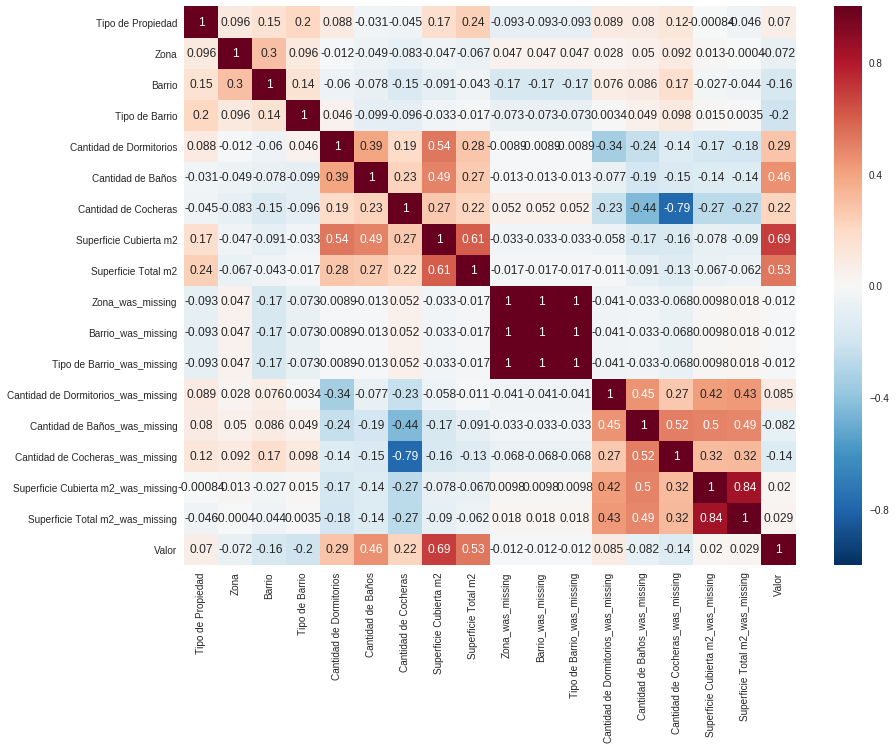

In [767]:
corr = df.corr()
sns.set(rc={'figure.figsize':(13.7,10.27)}) #Setting size of plots
sns.heatmap(corr, annot=True, annot_kws={"size": 12})

## **Comparing Models**

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [0]:
def tree (X,y):
    # Split into validation and training data
    train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
    # Specify a DecisionTreeRegressor Model
    iowa_model = DecisionTreeRegressor(random_state=1)
    # Fit Model
    iowa_model.fit(train_X, train_y)

    # Make validation predictions and calculate mean absolute error
    val_predictions = iowa_model.predict(val_X)
    val_mae = mean_absolute_error(val_predictions, val_y)
    print("   * DecisionTreeRegressor with no max_leaf_nodes: {:,.2f}".format(val_mae))

    # Using best value for max_leaf_nodes

    def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
        model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
        model.fit(train_X, train_y)
        preds_val = model.predict(val_X)
        mae = mean_absolute_error(preds_val,val_y)
        return(mae)

    mae_values = {}

    for max_leaf_nodes in range(10,5000,10):
        mae_values[max_leaf_nodes] = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)

    min_mae_value = min(mae_values, key=mae_values.get)

    iowa_model = DecisionTreeRegressor(max_leaf_nodes=min_mae_value, random_state=1)
    iowa_model.fit(train_X, train_y)
    val_predictions = iowa_model.predict(val_X)
    val_mae = mean_absolute_error(val_predictions, val_y)
    print("   * DecisionTreeRegressor with max_leaf_nodes: {:,.2f}".format(val_mae), '(with',min_mae_value, 'leaves)')
    
    # Define a RandomForestRegressor model. Set random_state to 1
    rf_model = RandomForestRegressor(random_state=1)
    rf_model.fit(train_X, train_y)
    rf_val_predictions = rf_model.predict(val_X)
    rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

    print("   * RandomForestRegressor with no max_leaf_nodes: {:,.2f}".format(rf_val_mae))   

    # Define the model. Set random_state to 1 and max_leaf_nodes

    def get_mae2(max_leaf_nodes, train_X, val_X, train_y, val_y):
        model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
        model.fit(train_X, train_y)
        preds_val = model.predict(val_X)
        mae = mean_absolute_error(preds_val, val_y)
        return(mae)

    mae2_values = {}
    for max_leaf_nodes in range(10,5000,10):
        mae2_values[max_leaf_nodes] = get_mae2(max_leaf_nodes, train_X, val_X, train_y, val_y)
    min_mae_value2 = min(mae2_values, key=mae2_values.get)

    rf_model = RandomForestRegressor(max_leaf_nodes=min_mae_value2, random_state=1)
    rf_model.fit(train_X, train_y)
    rf_val_predictions = rf_model.predict(val_X)
    rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

    print("   * RandomForestRegressor with max_leaf_nodes: {:,.2f}".format(rf_val_mae),'(with',min_mae_value2, 'leaves)')

In [0]:
def log_tree (X,y):
    # Split into validation and training data
    train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
    # Specify a DecisionTreeRegressor Model
    iowa_model = DecisionTreeRegressor(random_state=1)
    # Fit Model
    iowa_model.fit(train_X, train_y)

    # Make validation predictions and calculate mean absolute error
    val_predictions = iowa_model.predict(val_X)
    val_mae = mean_absolute_error(np.expm1(val_predictions), np.expm1(val_y))
    print("   * DecisionTreeRegressor with no max_leaf_nodes: {:,.2f}".format(val_mae))

    # Using best value for max_leaf_nodes

    def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
        model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
        model.fit(train_X, train_y)
        preds_val = model.predict(val_X)
        mae = mean_absolute_error(preds_val,val_y)
        return(mae)

    mae_values = {}

    for max_leaf_nodes in range(10,5000,10):
        mae_values[max_leaf_nodes] = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)

    min_mae_value = min(mae_values, key=mae_values.get)

    iowa_model = DecisionTreeRegressor(max_leaf_nodes=min_mae_value, random_state=1)
    iowa_model.fit(train_X, train_y)
    val_predictions = iowa_model.predict(val_X)
    val_mae = mean_absolute_error(np.expm1(val_predictions), np.expm1(val_y))
    print("   * DecisionTreeRegressor with max_leaf_nodes: {:,.2f}".format(val_mae), '(with',min_mae_value, 'leaves)')
    
    # Define a RandomForestRegressor model. Set random_state to 1
    rf_model = RandomForestRegressor(random_state=1)
    rf_model.fit(train_X, train_y)
    rf_val_predictions = rf_model.predict(val_X)
    rf_val_mae = mean_absolute_error(np.expm1(rf_val_predictions), np.expm1(val_y))

    print("   * RandomForestRegressor with no max_leaf_nodes: {:,.2f}".format(rf_val_mae))   

    # Define the model. Set random_state to 1 and max_leaf_nodes

    def get_mae2(max_leaf_nodes, train_X, val_X, train_y, val_y):
        model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
        model.fit(train_X, train_y)
        preds_val = model.predict(val_X)
        mae = mean_absolute_error(preds_val, val_y)
        return(mae)

    mae2_values = {}
    for max_leaf_nodes in range(10,5000,10):
        mae2_values[max_leaf_nodes] = get_mae2(max_leaf_nodes, train_X, val_X, train_y, val_y)
    min_mae_value2 = min(mae2_values, key=mae2_values.get)

    rf_model = RandomForestRegressor(max_leaf_nodes=min_mae_value2, random_state=1)
    rf_model.fit(train_X, train_y)
    rf_val_predictions = rf_model.predict(val_X)
    rf_val_mae = mean_absolute_error(np.expm1(rf_val_predictions), np.expm1(val_y))

    print("   * RandomForestRegressor with max_leaf_nodes: {:,.2f}".format(rf_val_mae),'(with',min_mae_value2, 'leaves)')

In [0]:
def XGB (X,y):
    # Split into validation and training data
    train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

    # Make validation predictions and calculate mean absolute error
    def get_mae(m, train_X, val_X, train_y, val_y):
        my_model = XGBRegressor(n_estimators=50000, learning_rate=0.01)
        my_model.fit(train_X, train_y, early_stopping_rounds=m, eval_set=[(val_X, val_y)], verbose=False)
        predictions = my_model.predict(val_X)
        mae = mean_absolute_error(predictions, val_y)
        return(mae)

    mae_values = {}

    for max_leaf_nodes in range(0,20000, 5000):
      mae_values[max_leaf_nodes] = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
      print(max_leaf_nodes,':',mae_values[max_leaf_nodes] )

    min_mae_value = min(mae_values, key=mae_values.get)
    print("   * XGBRegressor with early_stopping_rounds: {:,.4f}".format(mae_values[min_mae_value]), 
          '(with',min_mae_value, 'stops)')
    return min_mae_value

In [0]:
def log_XGB (X,y):
    # Split into validation and training data
    train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

    # Make validation predictions and calculate mean absolute error
    def get_mae(m, train_X, val_X, train_y, val_y):
        my_model = XGBRegressor(n_estimators=50000, learning_rate=0.01)
        my_model.fit(train_X, train_y, early_stopping_rounds=m, eval_set=[(val_X, val_y)], verbose=False)
        predictions = my_model.predict(val_X)
        mae = mean_absolute_error(np.expm1(predictions), np.expm1(val_y))
        return(mae)

    mae_values = {}

    for max_leaf_nodes in range(0,20000, 5000):
      mae_values[max_leaf_nodes] = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
      print(max_leaf_nodes,':',mae_values[max_leaf_nodes] )

    min_mae_value = min(mae_values, key=mae_values.get)
    print("   * XGBRegressor with early_stopping_rounds: {:,.4f}".format(mae_values[min_mae_value]), 
          '(with',min_mae_value, 'stops)')
    return min_mae_value

In [0]:
y = df.Valor
X = df.drop(columns=['Valor'])

In [774]:
tree(X,y)

   * DecisionTreeRegressor with no max_leaf_nodes: 27,747.49
   * DecisionTreeRegressor with max_leaf_nodes: 27,677.34 (with 4240 leaves)
   * RandomForestRegressor with no max_leaf_nodes: 25,145.12
   * RandomForestRegressor with max_leaf_nodes: 24,842.31 (with 2970 leaves)


In [0]:
m = XGB(X,y)

0 : 34942.278928539046
5000 : 24614.874920193877


## **Testing Final Model**

In [0]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = XGBRegressor(n_estimators=50000, learning_rate=0.01)
my_model.fit(train_X, train_y, early_stopping_rounds=m, eval_set=[(val_X, val_y)], verbose=False)

In [0]:
c = X.columns

row = [ ['Casa'  ,'Cerro-Argüello','Argüello'         ,'Abierto' ,2 ,2 ,1 ,115 ,180 ,False,False,False,False,False,False,False,False], #155.000
        ['Casa'  ,'Sudeste'       ,'Maipú Sección 2'  ,'Abierto' ,3 ,1 ,1 ,150 ,200 ,False,False,False,False,False,False,False,False], #140.000
        ['Casa'  ,'Oeste'         ,'Los Prados II'    ,'Abierto' ,3 ,2 ,1 ,130 ,300 ,False,False,False,False,False,False,False,False], #115.000
        ['Casa'  ,'Sudeste'       ,'San Vicente'      ,'Abierto' ,2 ,1 ,0 ,150 ,186 ,False,False,False,False,False,False,False,False], #90.000
        ['Casa'  ,'Cerro-Argüello','Villa Belgrano'   ,'Abierto' ,3 ,3 ,1 ,214 ,480 ,False,False,False,False,False,False,False,False], #220.000
        ['Casa'  ,'Oeste'         ,'Alto Alberdi'     ,'Abierto' ,4 ,4 ,1 ,217 ,270 ,False,False,False,False,False,False,False,False], #145.000
        ['Casa'  ,'Noroeste'      ,'Villa Cabrera'    ,'Abierto' ,2 ,1 ,1 ,90  ,142 ,False,False,False,False,False,False,False,False], #160.000
        ['Casa'  ,'Oeste'         ,'El Bosque'        ,'Country' ,3 ,3 ,2 ,330 ,1500,False,False,False,False,False,False,False,False], #380.000
      ]

Valor = [155000, 140000, 115000, 90000,220000,145000,160000, 380000]


for x,i in enumerate(row):
  for y,j in enumerate(i):
    for value in p:
      for v in value:
        if v == j:
          row[x][y] = value[j]
      
test = pd.DataFrame(row, columns=c)
test['Superficie Cubierta m2'] = np.log1p(test['Superficie Cubierta m2'])
test['Superficie Total m2'] = np.log1p(test['Superficie Total m2'])
test

In [0]:
final = my_model.predict(test)
final = np.expm1(final)
print('Real:', Valor)
print('Pred:', [int(i) for i in final])

a=0
for i,x in enumerate(final):
  a = a+(np.abs(x-Valor[i]))
print('MAE:', a/len(final)) #MAE: 12818.503348214286

In [0]:
# import pickle

# filename = 'Venta_casas_model.sav'
# pickle.dump(my_model, open(filename, 'wb'))
 
# # some time later...

# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))